# CS 6320 Project 1: Images as Functions and Pytorch Introduction

All projects in this course will be done with these iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).


You are expected to complete this notebook with lines of code, plots and texts. You will need to create new cells with original code or text for your analyses and explanations. Explain what you do and analyze your results. This assignment has a total of 100 points.


## Brief
    Project materials including writeup template proj1_6320.zip
    Hand-in: through Canvas
    Required files: <your_uid>.zip.(Please begin with 'u' for your uid)
<!---<your_uid>_proj1.pdf--> 

## Overview
The goal of this assignment is to apply basic operation on the images. An image can be viewed as a function of its individual pixels. Given a pixel coordination, we can get its value. In Part 1, you will practice how to get the values of the specified pixels in the images. In Part 2, you are expected to apply 2D transformation on the pixel coordination. In Part 3, you can use the transformation you wrote in Part 2 to preprocess the image in the dataset for a neural model. 

This project is intended to familiarize you with Python, PyTorch, and image transformation. Once you have created an image transformation function, it is relatively straightforward to create a new image with the transformation. If you don’t already know Python, you may find this [resource](https://docs.python.org/3/tutorial/) helpful. If you’re unfamiliar with PyTorch, the tutorials from the [official website](https://pytorch.org/tutorials/) are useful.

## Setup
   0. Unzip proj1_6320.zip and go to proj1_6320 directory.
      - You can run `unzip proj1_6320.zip && cd proj1_6320` in your terminal.
   1. Install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). It doesn’t matter whether you use Python 2 or 3 because we will create our own environment that uses 3 anyway.
   2. Create a conda environment using the appropriate command. On Windows, open the installed “Conda prompt” to run the command. On MacOS and Linux, you can just use a terminal window to run the command, Modify the command based on your OS (linux, mac, or win): `conda env create -f proj1_env_<OS>.yml`.
    - NOTE that proj1_env_<OS>.yml is inside the project folder.
   3. This should create an environment named ‘proj1’. Activate it using the Windows command, activate proj1 or the MacOS / Linux command, source activate proj1
   4. Install the project package, by running `pip install -e .` inside the repo folder.
   5. Run the notebook using `jupyter notebook` under *proj1_6320* directory.
   6. Ensure that all sanity checks are passing by running pytest tests inside the repo folder.
   7. Generate the zip folder for the code portion of your submission once you’ve finished the project using 
    
        `python zip_submission.py --uid <your_uid>` 
        
<!---(don’t forget to submit your report, too!).--->
    
    
## Writeup
For this project, this notebook itself is the report. You must run all your cells before you hand in it. Your code, results, visualization, and discussion will be used for the grading. You will be deducted poins if the results are not shown in this notebook. Do not change the order of the cells. You can add cells in need. You can copy a cell and run it separately if you need to run a cell multiple times and thus every result is displayed in the cell.
<!--For this project (and all other projects), you must do a project report using the template slides provided to you. Do not change the order of the slides or remove any slides, as this will affect the grading process on Gradescope and you will be deducted points. In the report you will describe your algorithm and any decisions you made to write your algorithm a particular way. Then you will show and discuss the results of your algorithm. The template slides provide guidance for what you should include in your report. A good writeup doesn’t just show results–it tries to draw some conclusions from the experiments. You must convert the slide deck into a PDF for your submission.

If you choose to do anything extra, add slides after the slides given in the template deck to describe your implementation, results, and analysis. Adding slides in between the report template will cause issues with Gradescope, and you will be deducted points. You will not receive full credit for your extra credit implementations if they are not described adequately in your writeup.
-->

## Rubric
    +3 pts: for each question in Part 1(+36 pts in total).
    +5 pts: get_scaling_matrix() in Part 2
    +5 pts: get_rotation_matrix() in Part 2
    +5 pts: get_translation_matrix() in Part 2
    +5 pts: multiplication order of sequential transformation in Part 2
    +24 pts: get_transform() in Part 2.
    +15 pts: ImageDataset() in Part 3.
    +5 pts: comparision of the predictions due to different preprocessing parameters in part 3.

    -5*n pts: Lose 5 points for every time you do not follow the instructions for the hand-in format.
    
Submission Format

This is very important as you will lose 5 points for every time you do not follow the instructions. You will attach two items in your submission on Canvas:

1. <your_uid>.zip containing:
    - proj1_code/ - directory containing all your code for this assignment
    - README.txt - (optional) if you implement any new functions other than the ones we define in the skeleton code (e.g. any extra credit implementations), please describe what you did and how we can run the code. We will not award any extra credit if we can’t run your code and verify the results.
<!--2. <your_uid>_proj1.pdf - your report-->

Do not install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that’s not in there by default will probably cause your code to break during grading. Do not use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using python zip_submission.py --uid <your_uid> (it will zip up the appropriate directories/files for you!) and hand it in with your PDF through Canvas.

### Credits
Assignment developed by Xin Yu, Tucker Hermans.

## [Part 1: Images as Functions](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html)

To better understand the inherent properties of images and the technical procedure used to manipulate and process them, we can think of an image, which is comprised of individual pixels, as a function, f. Each pixel also has its own value. For a grayscale image, each pixel would have an intensity between 0 and 255, with 0 being black and 255 being white. f(x,y) would then give the intensity of the image at pixel position (x,y), assuming it is defined over a rectangle, with a finite range: f: [a,b] x [c,d] → [0, 255].

<img src="../extra_files/image_as_function_gray.jpg" alt="drawing" width="300"/>

A color image is just a simple extension of this. f(x,y) is now a vector of three values instead of one. Using an RGB image as an example, the colors are constructed from a combination of Red, Green, and Blue (RGB). Therefore, each pixel of the image has three channels and is represented as a 1x3 vector. Since the three colors have integer values from 0 to 255, there are a total of 256*256*256 = 16,777,216 combinations or color choices.

f(x,y) can be represented as three functions merged together.
<img src='../extra_files/image_as_function_rgb_function.jpg' width="200"/>
<img src='../extra_files/image_as_function_rgb.jpg' width="300"/>

### Input images

Find two interesting images to use. They should be color. You might find some classic vision
 examples in http://sipi.usc.edu/database/database.php?volume=misc Make sure they are not larger than 512x512.


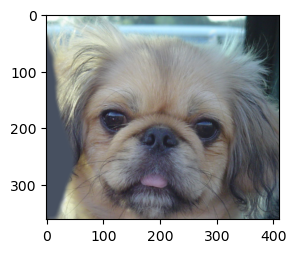

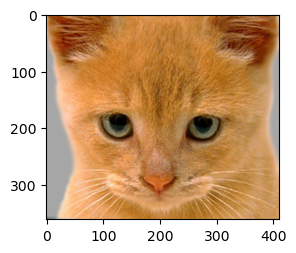

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

from utils import load_image, save_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

image1 = load_image('../data/1a_dog.bmp')
image2 = load_image('../data/1b_cat.bmp')

# display the dog and cat images
plt.figure(figsize=(3,3)) 
plt.imshow((image1*255).astype(np.uint8))
plt.show()

plt.figure(figsize=(3,3))
plt.imshow((image2*255).astype(np.uint8))
plt.show()

### 1.1 Color planes

You are expected to get image planes for the specified channels, visualize them and answer the questions.
1. Swap the red and blue pixels of image 1 (Store as M1rb).
   - Output: new image
2. Create a monochrome image (M1g) by selecting the green channel of image 1
   - Output: new image
3. Create a monochrome image (M1r) by selecting the red channel of image 1
   - Output: new image 
4. Which looks more like what you’d expect a monochrome image to look like? Would you expect a computer vision algorithm to work on one better than the other? 
   - Output: response

In [2]:
## implement the code and show your results here
# M1rb
# M1g
# M1r 
############################
### TODO: YOUR CODE HERE ###
# Swap red and blue pixels
M1rb = image1.copy()
red_pxls = image1[:,:,0]
blue_pxls = image1[:,:,1]
M1rb[:,:,0] = blue_pxls
M1rb[:,:,1] = red_pxls

# Create a monochrome (green) image
M1g = image1[:,:,1].copy()

# Create a monochrome (red) image
M1r = image1[:,:,0].copy()

### END OF STUDENT CODE ####
############################

<font color="red">Answer for number 4 is incomplete. Make sure you are doing things correctly with professor / TA's</font>

### Show results

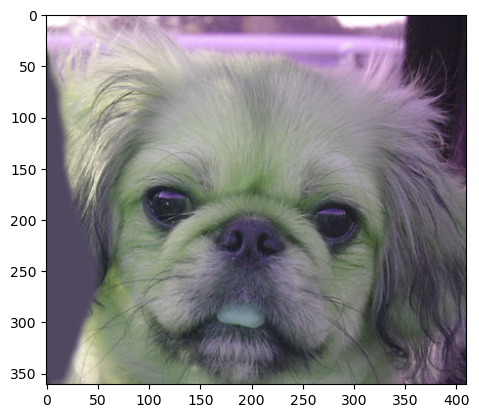

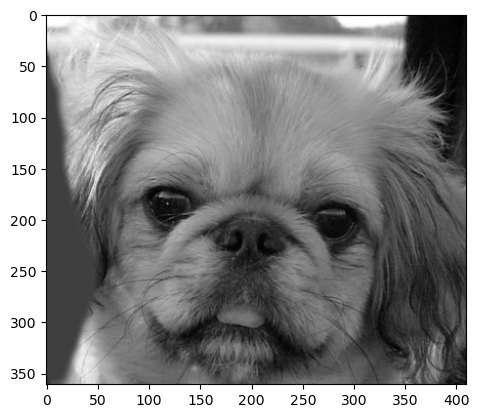

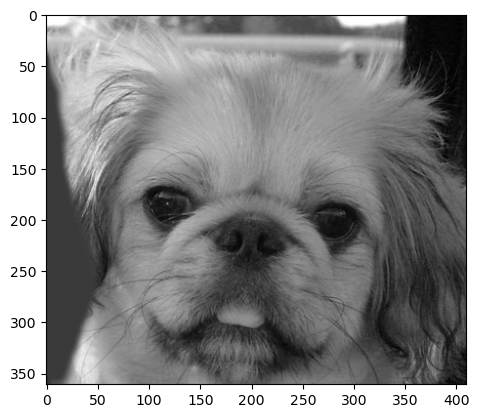

In [3]:
plt.figure()
plt.imshow((M1rb*255).astype(np.uint8))
plt.show()

plt.figure()
plt.imshow(M1g,cmap='gray') # use gray for monochrome images.
plt.show()

plt.figure()
plt.imshow(M1r,cmap='gray')
plt.show()

### Save results

In [4]:
save_image('../results/part1/M1rb.jpg', M1rb)
save_image('../results/part1/M1g.jpg', M1g)
save_image('../results/part1/M1r.jpg', M1r)

True

### 1.2 Replacement of pixels

Take the inner square of 100x100 pixels of monochrome version of image 1 and insert them into the monochrome version of image 2.
- new image (saved as replacement.jpg)

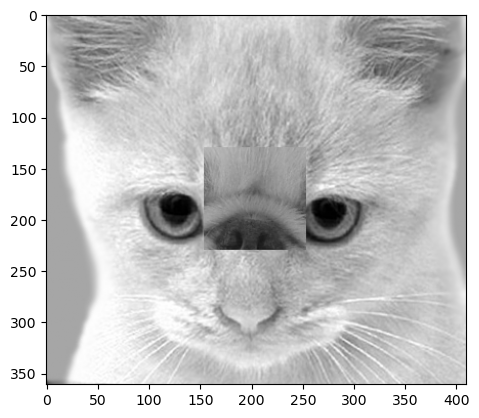

In [5]:
############################
### TODO: YOUR CODE HERE ###
mono_img1 = image1[:,:,0].copy()
mono_img2 = image2[:,:,0].copy()

height, width = mono_img1.shape

# Minus 50 so we can go fifty behind the center and 50 after the center
start_row = ((height - 1)//2) - 50
start_col = ((width - 1)//2) - 50

mono_img2[start_row : start_row+100, start_col:start_col + 100] = mono_img1[start_row : start_row+100, start_col:start_col + 100]
plt.figure()
plt.imshow(mono_img2,cmap='gray')
plt.show()
### END OF STUDENT CODE ####
############################

### 1.3 Arithmetic and Geometric operation

1. What is the min and max of the pixel values of M1g? What is the mean? What is the standard deviation? And how did you compute these?
   - Output: response
2. Subtract the mean from all the pixels, then divide by the standard deviation, then multiply by 10 (if your image is zero to 255) or by 0.05 (if your image ranges from 0.0 to 1.0). Now add the mean back in.
   - Ouptut: new image (saved as subtract.jpg)
3. Shift M1g to the left by 2 pixels. 
   - Output: new image (saved as shift1.jpg)
4. Subtract the shifted version of M1g from the original and make sure that the values are legal (what do negative numbers for pixels mean anyway?).
   - Output: new image (saved as shift2.jpg)

Min: 0.08627451
Max: 1.0
Mean 0.48815045
Standard Deviation: 0.20117572


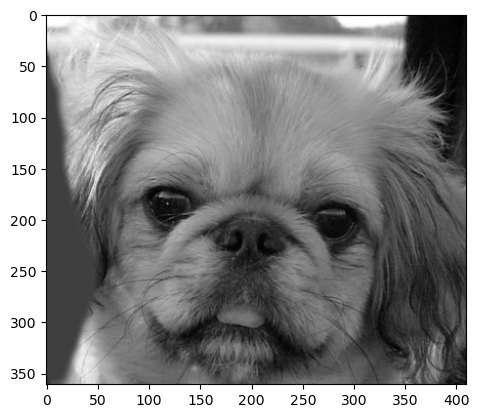

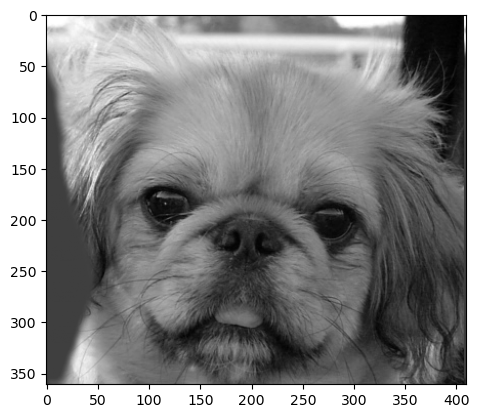

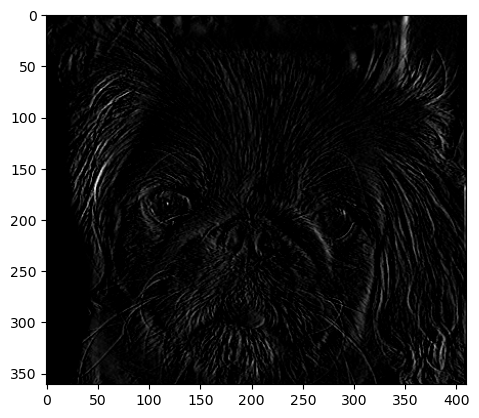

In [6]:
############################
### TODO: YOUR CODE HERE ###
# Min
M1g_min = np.min(M1g)
print("Min: " + str(M1g_min))
# Max
M1g_max = np.max(M1g)
print("Max: " + str(M1g_max))
# Mean
M1g_mean = np.mean(M1g)
print("Mean " + str(M1g_mean))
# Standard Deviation
M1g_sd = np.std(M1g)
print("Standard Deviation: " + str(M1g_sd))

# subtract.jpg
subtract = M1g.copy()
subtract -= M1g_mean
subtract /= M1g_sd
subtract *= 0.05
subtract += M1g_mean

plt.figure()
plt.imshow(subtract,cmap='gray')
plt.show()

shift1 = M1g.copy()
shift1 = np.roll(shift1, -2, axis=1)
plt.figure()
plt.imshow(shift1,cmap='gray')
plt.show()

shift2 = M1g.copy()
shift2 -= shift1
shift2 = np.clip(shift2, 0, None)
plt.figure()
plt.imshow(shift2,cmap='gray')
plt.show()

### END OF STUDENT CODE ####
############################

### 1.4 Noise

1. Take the original colored image and strat adding Gaussian noise to the pixels in the green channel. Increase sigma until the noise is somewhat visible.
   - Ouput: new image (saved as noise1.jpg). Response: what is sigma? 
2. Now, instead add that amount of noise to the blue channel.
   - Output: new image (saved as noise2.jpg)
3. Which looks better? Why?
   - Output: The image that had noise added to the blue channel looks significantly better. This is because human eyes are the most perceptive to the green channel of colors. So if we add gaussian noise to the green channel we will notice it more than if we add noise to the blue channel.

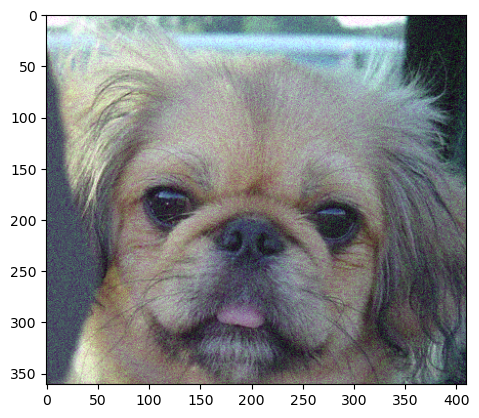

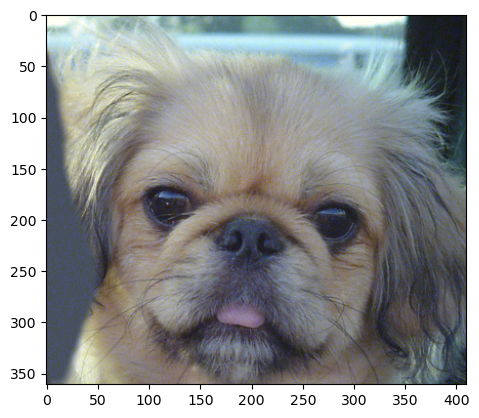

In [7]:
############################
### TODO: YOUR CODE HERE ###
mean = 0
sigma = 0.08
gaussian = np.random.normal(mean, sigma, (image1.shape[0], image2.shape[1]))
noise1 = image1.copy()
noise1[:,:,1] = noise1[:,:,1] + gaussian
noise1 = np.clip(noise1,0,1)

plt.figure()
plt.imshow(noise1)
plt.show()

noise2 = image1.copy()
noise2[:,:,2] = noise2[:,:,2] + gaussian
noise2 = np.clip(noise2,0,1)
plt.figure()
plt.imshow(noise2)
plt.show()
### END OF STUDENT CODE ####
############################

## Part2: 2D transformations

### 2.1 Homogenous Coordinates
For 2D transformation, we are able to multiply a 2x2 transformation matrix. Take the scale transformation as example, it can be written as a matrix mutiplication on the coordinate of a point.
<img src='../extra_files/scale_matrix2d_2.jpg' width='250'>

To perform a sequence of transformation such as translation followed by rotation and scaling, we need to follow a sequential process. For example,

   - Translate the coordinates,
   - Rotate the translated coordinates, and then
   - Scale the rotated coordinates to complete the composite transformation.

To shorten this process, we will use 3×3 transformation matrix instead of 2×2 transformation matrix. To convert a 2×2 matrix to 3×3 matrix, we have to add an extra dummy coordinate W.

In this way, we can represent the point by 3 numbers instead of 2 numbers, which is called Homogenous Coordinate system. In this system, we can represent all the transformation equations in matrix multiplication. Any Cartesian point P (X,Y) can be converted to homogenous coordinates by P’ (Xh, Yh, h).

<img src='../extra_files/homogeneous_transformation.jpg' width='600'>

Thus we can follow a sequetial process to peform a sequence of transformations. For example,

<img src='../extra_files/homogeneous_transformation_composition.jpg' width='500'>

Please see the [slides](https://dellaert.github.io/19F-4476/Slides/S02-Geometry.pdf) for the mathmatical details.

#### 2.1.1 2D transformation 
1. We will apply the 2D transformation to image preprocessing, which are composition of multiple operations. Before that, you are expected to implement scaling, rotation, translation operation seperately.

In [8]:
def get_scaling_matrix(scale_x, scale_y):
    """Generate scaling transformation matrix"""
    '''
        Input:
            scale_x: scaling factor along x axis
            scale_y: scaling factor along y axis
        Output: 
            scaling_matrix: 3x3 matrix
    '''
    ############################
    ### TODO: YOUR CODE HERE ###
    return np.array([[scale_x, 0,0], [0, scale_y, 0], [0, 0, 1]])
    ### END OF STUDENT CODE ####
    ############################

def get_rotation_matrix(rot_angle_degree):
    """Generate rotation transformation matrix"""
    '''
        Input:
            rot_angle_degree: rotation angle in degree
        Output: 
            rotation_matrix: 3x3 matrix
    '''
    ############################
    ### TODO: YOUR CODE HERE ###
    # np.sin and np.cos expect radians! 
    rot_angle_rad = np.radians(rot_angle_degree)
    return np.array([[np.cos(rot_angle_rad), -1 * np.sin(rot_angle_rad), 0], [np.sin(rot_angle_rad), np.cos(rot_angle_rad), 0],[0,0,1]])
    ### END OF STUDENT CODE ####
    ############################
    
def get_translation_matrix(delta_x, delta_y):
    """Generate scaling transformation matrix"""
    '''
        Input:
            delta_x: movement along x axis
            delta_y: movement along y axis
        Output: 
            translation_matrix: 3x3 matrix
    '''
    ############################
    ### TODO: YOUR CODE HERE ###
    return np.array([[1,0,delta_x],[0,1,delta_y],[0,0,1]])
    ### END OF STUDENT CODE ####
    ############################

2. Given a point, test the transformations seperately.

In [9]:
def test_transformation():
    point = np.array([2,2])
    point_homo = np.hstack((point, np.ones(1)))
    point1 = np.dot(get_scaling_matrix(0.5, 1), point_homo)
    np.testing.assert_array_equal(point1, [1,2,1], "Please check get_scaling_matrix() function")
    
    point2 = np.dot(get_rotation_matrix(45), point_homo)
    np.testing.assert_allclose(point2, [0,np.sqrt(8),1], atol=1e-5, rtol=0, 
                               err_msg="Please check get_rotation_matrix() function", )
    
    point3 = np.dot(get_translation_matrix(-1,1), point_homo)
    np.testing.assert_array_equal(point3, [1,3,1], "Please check get_translation_matrix() function")

test_transformation()

3. Composition of transformation: does the multiplication order matter? 
    - Please try different order and verify your answer with some examples.

In [10]:
############################
### TODO: YOUR CODE HERE ###
point = np.array([2,2])
point_homo = np.hstack((point, np.ones(1)))

# Order 1
order1 = np.dot(get_scaling_matrix(0.5,1), point_homo)
order1 = np.dot(get_rotation_matrix(45), order1)
order1 = np.dot(get_translation_matrix(-1,1), order1)

order2 = np.dot(get_rotation_matrix(45), point_homo)
order2 = np.dot(get_translation_matrix(-1,1), order2)
order2 = np.dot(get_scaling_matrix(0.5,1), order2)

order3 = np.dot(get_translation_matrix(-1,1), point_homo)
order3 = np.dot(get_scaling_matrix(0.5,1), order3)
order3 = np.dot(get_rotation_matrix(45), order3)

print(order1)
print(order2)
print(order3)

if (np.array_equal(order1, order2) and np.array_equal(order2, order3)):
    print("Order does not matter!")
else:
    print("Order matters")
### END OF STUDENT CODE ####
############################

[-1.70710678  3.12132034  1.        ]
[-0.5         3.82842712  1.        ]
[-1.76776695  2.47487373  1.        ]
Order matters


### 2.2 the 2D transformation on images
In a computer vision/image processing task, we always needs to apply 2D transformation on the images, such as crop, rotation, flip and so on. 

    - crop: crop a rectangular portion of any image
    - rotation: rotate an image around a given center
    
We show a bounding box in red in an example image, which centers at the red dot.
<img src='../extra_files/bb_dog1.jpg' width=300>
The crop operation will crop the image and get the image area inside the bounding box:
<img src='../extra_files/crop_dog11.jpg' width=150>
If the rotation operation is required, we will rotate the original image firstly and then crop it. 
<img src='../extra_files/rot_dog11.jpg' width=150>

1. You are expected to generate the transformation matrix for image crop with rotation enabled. The cropped portion of an image is defined with a bounding box(bb) represented as:
     - center of the bounding box: (x,y) in the original image
     - scale: actual_bb_edge_length/200
              we define: for a scale of 1, we get a square bounding box of size `[200 x 200]'. 
              to get a target bounding box size, we set the scale = target_bb_size / 200.
              hence the shape is `[200 x scale, 200 x scale]`
              

##### Instructions

1. **Mapping Coordinates (Translation and Scaling):**
   - First, map the coordinates of the original image to the cropped image. While doing this, account for **translation** to shift the center of the bounding box to the origin \((-x, -y)\), followed by **scaling** to adjust the bounding box to the target size.

2. **Applying Rotation:**
   - Move the origin of the cropped image to its center to facilitate rotation.
   - Rotate the image by -rot degrees (assign rot = -rot) to match the image coordinate system).
   - After rotation, move the origin back to the top-left corner.


##### HINTS
- To keep the bounding box center, you need to rotate the image around the center.
- Please pay attention to the order of matrix multiplication: **Translation → Scaling → Rotation**.
- As seen in the above figure, the pixel \((0, 0)\) is located at the top-left corner of the image, which is different from the standard 2D coordinate system. To match the direction of rotation of an image, you need to assign:
  $$
  \text{rot} = -\text{rot}.
  $$
- You can use the functions defined in the previous sections to implement these transformations.

In [11]:
from PIL import Image
import numpy as np

def get_transform(center, scale, res, rot=0):
    """Generate transformation matrix that transform a point in an image for image cropping"""
    ''' 
        bounding box representation:
             center: position of the bounding box center in the original image
             scale: scale = actual_bb_edge_length/200
                    then, the shape is [200 x scale, 200 x scale]
        res: the resolution of the cropped image. It can be different from the bounding box size, and you will
             need to apply the scaling operation to make the cropped image get the 'res' resolution.
        rot: rotation angle in degrees. 
        output: 3 x 3 matrix
        
        NOTE:
        - The coordinates from the original image must be rotated and mapped to the cropped image while also
        accounting for scaling.
        - For Example the top left corner (0,0) of the cropped image may have non-zero coordinates in the original image.
        This needs to be accounted for translation, rotation and scaling to match the target resolution.
        - Please pay attention to the order of multiplication.
        - The scale of the bb is different from res. The scale defines the size of the bounding box and inturn the portion
        of the image to be cropped. The res defines the target size of the cropped image i.e. the cropped image has to be
        scaled to meet the desired res.
        - You can use the functions defined in the previous sections.
    '''
    ############################
    ### TODO: YOUR CODE HERE ###
    x,y = center
    bb_size = scale * np.array([200,200])
    bb_scale = res / bb_size
    bb_scale_x, bb_scale_y = bb_scale
    transformation_matrix = get_translation_matrix(res[0] / 2, res[1] / 2) @ get_rotation_matrix(-rot) @ get_scaling_matrix(bb_scale_x, bb_scale_y) @ get_translation_matrix(-x,-y) 
    return transformation_matrix

    ### END OF STUDENT CODE ####
    ############################

def transform(pt, center, scale, res, rot=0, invert=0):
    """Transform pixel location to different reference."""
    '''
    NOTE:
         bounding box representation:
             center: position of the bounding box center in the original image
             scale: scale = actual_bb_edge_length/200
                    then, the shape is [200xscale, 200xscale]
     Transform:
         translate:
             from orig_img coord to bbox coord, if invert=0
             from bbox coord to orig_img, if invert=1
    '''
    t = get_transform(center, scale, res, rot=rot)
    if invert:
        t = np.linalg.inv(t)
    new_pt = np.array([pt[0]-1, pt[1]-1, 1.]).T
    new_pt = np.dot(t, new_pt)
    return new_pt[:2].astype(int)+1

def flip_img(img):
    """Flip rgb images or masks.
    channels come last, e.g. (256,256,3).
    """
    img = np.fliplr(img)
    return img

def crop(img, center, scale, res, rot=0):
    """Crop image according to the supplied bounding box."""
    '''
     NOTE:
         bounding box representation:
             center: position of the bounding box center in the original image
             scale: scale = actual_bb_edge_length/200
                    then, the shape is [200xscale, 200xscale]
     Transform:
         translate:
             from orig_img coord to bbox coord, if invert=0
             from bbox coord to orig_img, if invert=1
    '''
    # Upper left point
    ul = np.array(transform([1, 1], center, scale, res, invert=1))-1
    # Bottom right point
    br = np.array(transform([res[0]+1,
                             res[1]+1], center, scale, res, invert=1))-1
    # Padding so that when rotated proper amount of context is included
    pad = int(np.linalg.norm(br - ul) / 2 - float(br[1] - ul[1]) / 2)
    if not rot == 0:
        ul -= pad
        br += pad

    new_shape = [br[1] - ul[1], br[0] - ul[0]]
    if len(img.shape) > 2:
        new_shape += [img.shape[2]]
    new_img = np.zeros(new_shape)

    # Range to fill new array
    new_x = max(0, -ul[0]), min(br[0], len(img[0])) - ul[0]
    new_y = max(0, -ul[1]), min(br[1], len(img)) - ul[1]
    # Range to sample from original image
    old_x = max(0, ul[0]), min(len(img[0]), br[0])
    old_y = max(0, ul[1]), min(len(img), br[1])
    new_img[new_y[0]:new_y[1], new_x[0]:new_x[1]] = img[old_y[0]:old_y[1],
                                                        old_x[0]:old_x[1]]

    if not rot == 0:
        pil_img = Image.fromarray(
            (new_img*255.0).round().clip(0,255).astype(np.uint8)
            if new_img.dtype != np.uint8 else new_img
        )
        pil_img = pil_img.rotate(rot, resample=Image.BILINEAR, expand=False)
        new_img = np.asarray(pil_img)
        new_img = new_img[pad:-pad, pad:-pad]

    pil_img = Image.fromarray(
        (new_img*255.0).round().clip(0,255).astype(np.uint8)
        if new_img.dtype != np.uint8 else new_img
    )
    pil_img = pil_img.resize((int(res[0]), int(res[1])), resample=Image.BILINEAR)
    new_img = np.asarray(pil_img)
    return new_img        

def rgb_processing(rgb_img, center, scale, res, rot, flip):
    """Process rgb image and do augmentation."""
    rgb_img = crop(rgb_img, center, scale,
                  res, rot=rot)
    # flip the image
    if flip:
        rgb_img = flip_img(rgb_img)
    #rgb_img = np.transpose(rgb_img.astype('float32'),(2,0,1))/255.0
    return rgb_img/255.0

2. run the following cell and you should get similar results as shown at the begging of section 2.2.

Test 1 Passed: 90-degree rotation
Test 2 Passed: 180-degree rotation


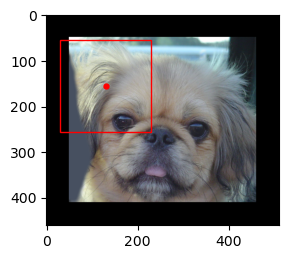

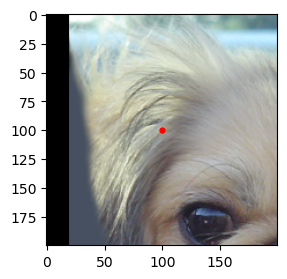

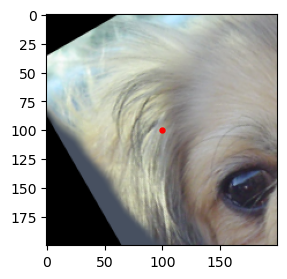

In [12]:
# Test case to validate the rotation of the image in the transform function
def test_transform_rotation():
    """
    Tests the rotation functionality of the transform function with a tolerance of ±3 points for each coordinate.
    """
    tolerance = 3

    # Test 1: 90-degree rotation
    input_point = [120, 100]
    center_point = [100, 100]
    scale = 1
    output_shape = [200, 200]
    rotation = 90
    invert = 0
    expected_output_90 = [100, 80]

    output_90 = transform(input_point, center_point, scale, output_shape, rot=rotation, invert=invert)

    if all(abs(o - e) <= tolerance for o, e in zip(output_90, expected_output_90)):
        print("Test 1 Passed: 90-degree rotation")
    else:
        print(f"Test 1 Failed: 90-degree rotation, expected {expected_output_90}, got {output_90}")

    # Test 2: 180-degree rotation
    rotation = 180
    expected_output_180 = [80, 100]  # Allowing for small rounding errors

    output_180 = transform(input_point, center_point, scale, output_shape, rot=rotation, invert=invert)
    
    if all(abs(o - e) <= tolerance for o, e in zip(output_180, expected_output_180)):
        print("Test 2 Passed: 180-degree rotation")
    else:
        print(f"Test 2 Failed: 180-degree rotation, expected {expected_output_180}, got {output_180}")


# Run the test function
test_transform_rotation()

h,w,c=image1.shape
im1 = np.zeros([h+100,w+100,3])
im1[50:h+50,50:w+50,:] = image1
plt.figure(figsize=(3,3)); plt.imshow((im1*255).astype(np.uint8));
plt.scatter(130, 155, marker='.', color='r', s =50)
rectangle=plt.Rectangle((30,55), 200, 200, color='r', fill=False)
plt.gca().add_patch(rectangle)
plt.show()

im1_rot = rgb_processing(image1, [80,105], 1, [200,200], 0, 0)
plt.figure(figsize=(3,3)); plt.imshow((im1_rot*255).astype(np.uint8));
plt.scatter(100, 100, marker='.', color='r', s =50)
plt.show()

im1_rot = rgb_processing(image1, [80,105], 1, [200,200], 30, 0)
plt.figure(figsize=(3,3)); plt.imshow((im1_rot*255).astype(np.uint8));
plt.scatter(100, 100, marker='.', color='r', s =50)
plt.show()

## Part 3: PyTorch 

### Instantiate model & dataset
- Dataloader. 
    You will now implement creating images again but using PyTorch. The ImageDataset class will load a list of images from data/ directory and apply 2D transformation on them using rgb_processing() function. Refer to this [tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) for additional information on data loading & processing.


- Model. 
    Next, we will load a pretrained model instead of our own implementation. This model is trained on ImageNet for classification task.  [ImageNet](http://www.image-net.org/about-overview) consists of over 15 million labeled high-resolution images in 1000 classes. The output of the evaluation using this model is a array of probabilities that the input image belongs to a certain class. We will show the top-5 prediction for each input image.

    Refer to this [tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) for additional information on defining neural networks using PyTorch and this [page](https://gist.github.com/RamonYeung/988945c805938636fc85c5385bd3d1b4) for more methods to load a pretrained model.


3.1. You are expected to implement the ImageDataset() class. You must apply the defined rgb_preprocessing() to image for the transforms. There are three sets of parameters in rgb_preprocessing() to define the transformations:
   - define bounding box for crop: center, scale, res.
     <span style="color:red">Specify the output res as [224,224].<span>
   - rot: <span style="color:red">You must use a random value in the range [0,90].<span>
   - flip: <span style="color:red">You must randomly set it to be 0 or 1.<span>

In [ ]:
import torch.utils.data as data
from os import listdir
from os.path import isfile, join, basename
import random

class ImageDataset(data.Dataset):
    """images dataset."""

    def __init__(self, image_dir: str) -> None:
        """
        ImageDataset class constructor.

        You must get the absolute paths of all images under image_dir

         Args:
         - image_dir: string specifying the directory containing images
        """
        self.images = [join(image_dir,f) for f in listdir(image_dir) if isfile(join(image_dir, f))]
        ############################
        ### TODO: YOUR CODE HERE ###
        # Define additional variables if needed here 
        ### END OF STUDENT CODE ####
        ############################
    def __len__(self) -> int:
        """Returns number of images in dataset."""

        ############################
        ### TODO: YOUR CODE HERE ###
        return len(self.images)
        ### END OF STUDENT CODE ####
        ############################
    def __getitem__(self, idx: int) -> torch.Tensor:
        """
         Returns the images at index `idx`.

         Since self.images contain paths to the images, you should read the images here and 
         apply preprocess to each image with rgb_processing() function.
         Make sure you transpose the dimensions so that image_a and image_b are of
         shape (c, h, w) instead of the typical (h, w, c), and convert them to
         torch Tensors.
         
         You must apply the defined rgb_preprocessing() to image for the transforms. You can 
         specify additional transforms if you want to. There are three sets of parameters in rgb_preprocessing()
         to define the transformations:
             - define bounding box for crop: center, scale, res
             - rot: You must use a random value in the range [0,90].
             - flip: You must randomly set it to be 0 or 1.

         Args
         - idx: int specifying the index at which data should be retrieved
         Returns
         - orig_im
         - im: Tensor of shape (c, h, w) for image after applying rgb_preprocessing()
         - im_name: the base name of the fetched image
         """

        ############################
        ### TODO: YOUR CODE HERE ###
        # Read image at self.images[idx]
        im_orig = load_image(self.images[idx])
        # Apply preprocessing with rgb_processing() 
        # - (Ensure that the shape is (c,h,w) and convert to torch tensors)
        # - (Define parameters as above)
        im = im_orig.copy()
        # im = rgb_processing(im, (250,250), 1, (224,224), np.random.uniform(0,91), np.random.uniform(0,2))
        im = rgb_processing(im, (250,250), 2, (224,224), 0, 0)
        im = np.transpose(im, (2,0,1))
        # The torch model we are using expects double type
        im = torch.from_numpy(im).float()
        im_name = self.images[idx]
        ### END OF STUDENT CODE ####
        ############################

        return im_orig, im, im_name

3.2. Run the next cell. It will visualize the origial images and its correspondance after preprocessing. You will get the top-5 prediction of the classication for each image. As the image preprocessing are randomly set, what is the difference of the predictions for multiple runs? Show the results for different run and write down you observation.

**Note:** Create more cells for multiple runs and state your observations. 

In [37]:
import torch
from torchvision.models import resnet101

data_root = '../data' # if you're using additional data, make sure to change this to '../additional_data'
dataset = ImageDataset(data_root)
data_size = len(dataset)
print("There are {} images under {}".format(data_size, data_root))

dataloader = torch.utils.data.DataLoader(dataset)
data_iter = iter(dataloader)

# First, load the model
resnet = resnet101(pretrained=True)
with open('../imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

f = plt.figure(figsize=(10,30))
# Second, put the network in eval mode
resnet.eval()
for i in range(data_size):
    [im_orig, im, im_name] = next(data_iter)
#     print(type(im_orig), im_orig.shape)
#     print(type(im), im.shape)
    ax = f.add_subplot(data_size, 2, i*2+1)
    ax.imshow(im_orig.squeeze())
    im_show = im.squeeze().permute([1,2,0])
    ax = f.add_subplot(data_size, 2, i*2+2)
    ax.imshow(im_show)
    
    # Third, carry out model inference
    out = resnet(im)

    # Fourth, print the top 5 classes predicted by the model
    _, indices = torch.sort(out, descending=True)
    scores = torch.nn.functional.softmax(out, dim=1)[0] 
    print("Classify the image: {} and show top 5 prediction results and their scores ".format(im_name[0]))
    for idx in indices[0][:5]:
        print('\t %s: %.3f'%(labels[idx], scores[idx].item()))
    

There are 10 images under ../data
Classify the image: ../data\1a_dog.bmp and show top 5 prediction results and their scores 
	 plastic bag: 0.089
	 Maltese dog, Maltese terrier, Maltese: 0.071
	 quill, quill pen: 0.024
	 West Highland white terrier: 0.023
	 toilet tissue, toilet paper, bathroom tissue: 0.020
Classify the image: ../data\1b_cat.bmp and show top 5 prediction results and their scores 
	 Persian cat: 0.490
	 white wolf, Arctic wolf, Canis lupus tundrarum: 0.065
	 Arctic fox, white fox, Alopex lagopus: 0.037
	 Samoyed, Samoyede: 0.026
	 West Highland white terrier: 0.015
Classify the image: ../data\2a_motorcycle.bmp and show top 5 prediction results and their scores 
	 web site, website, internet site, site: 0.044
	 envelope: 0.043
	 wall clock: 0.035
	 analog clock: 0.021
	 matchstick: 0.020
Classify the image: ../data\2b_bicycle.bmp and show top 5 prediction results and their scores 
	 web site, website, internet site, site: 0.033
	 envelope: 0.022
	 pedestal, plinth, foot